In [2]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import matplotlib as plt

In [24]:
browser = webdriver.Chrome()
browser.get("https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm")
browser.maximize_window()
wait = WebDriverWait(browser, 15)
show_table_button = wait.until(
    EC.element_to_be_clickable((By.LINK_TEXT, "Show table"))
)

show_table_button.click()

time.sleep(2)

table = browser.find_element(By.TAG_NAME, "table")
rows = table.find_elements(By.TAG_NAME, "tr")

month_years, total_rates, men_rates, women_rates, teen_rates, white_rates, black_rates, asian_rates, latino_rates = ([] for _ in range(9))

for row in rows[1:]:
    cols = row.find_elements(By.TAG_NAME, "td")
    if len(cols) == 8:
        th = row.find_element(By.TAG_NAME, "th")
        month_year = th.find_element(By.CLASS_NAME, "sub0").text
        month_years.append(month_year)
        
        total_rates.append(cols[0].text)
        men_rates.append(cols[1].text)
        women_rates.append(cols[2].text)
        teen_rates.append(cols[3].text)
        white_rates.append(cols[4].text)
        black_rates.append(cols[5].text)
        asian_rates.append(cols[6].text)
        latino_rates.append(cols[7].text)

unemployment_df = pd.DataFrame({
    "Date": month_years,
    "Total Rate": total_rates,
    "Male Rate": men_rates,
    "Female Rate": women_rates,
    "Teen Rate": teen_rates,
    "White Rate": white_rates,
    "Black Rate": black_rates,
    "Asian Rate": asian_rates,
    "Hispanic Rate": latino_rates
})

browser.quit()

print(unemployment_df.head(10))

        Date Total Rate Male Rate Female Rate Teen Rate White Rate Black Rate  \
0   Mar 2005        5.2       4.6         4.6      17.1        4.5       10.5   
1   Apr 2005        5.2       4.4         4.6      17.8        4.4       10.3   
2   May 2005        5.1       4.3         4.7      17.8        4.4       10.1   
3  June 2005        5.0       4.3         4.6      16.3        4.3       10.2   
4  July 2005        5.0       4.2         4.6      16.1        4.2        9.2   
5   Aug 2005        4.9       4.3         4.4      16.1        4.2        9.7   
6  Sept 2005        5.0       4.5         4.6      15.5        4.4        9.4   
7   Oct 2005        5.0       4.3         4.5      16.1        4.4        9.1   
8   Nov 2005        5.0       4.3         4.6      17.0        4.3       10.6   
9   Dec 2005        4.9       4.3         4.4      14.9        4.2        9.2   

  Asian Rate Hispanic Rate  
0        3.9           5.8  
1        4.2           6.4  
2        4.2         

In [25]:
sp500_df = pd.read_csv("spy.csv")
sp500_df.head(10)

,Date,Open,High,Low,Close,Volume,Day,Weekday,Week,Month,Year
0,1993-01-29,24.469912,24.469912,24.348171,24.452520,1003200,29,4,4,1,1993
1,1993-02-01,24.469918,24.626442,24.469918,24.626442,480500,1,0,5,2,1993
2,1993-02-02,24.609034,24.695992,24.556860,24.678600,201300,2,1,5,2,1993
3,1993-02-03,24.713392,24.956873,24.696000,24.939482,529400,3,2,5,2,1993
4,1993-02-04,25.026437,25.096004,24.748173,25.043829,531500,4,3,5,2,1993
5,1993-02-05,25.026436,25.078610,24.887303,25.026436,492100,5,4,5,2,1993
6,1993-02-08,25.026436,25.113394,24.991653,25.026436,596100,8,0,6,2,1993
7,1993-02-09,24.939478,24.939478,24.800345,24.852520,122100,9,1,6,2,1993
8,1993-02-10,24.852521,24.904696,24.782955,24.887304,379600,10,2,6,2,1993
9,1993-02-11,24.922087,25.113394,24.922087,25.009045,19500,11,3,6,2,1993


In [26]:
unemployment_df["Date"] = pd.to_datetime(unemployment_df["Date"]).dt.strftime('%b %Y')
unemployment_df["Total Rate"] = pd.to_numeric(unemployment_df["Total Rate"], errors='coerce')
unemployment_df["Male Rate"] = pd.to_numeric(unemployment_df["Male Rate"], errors='coerce')
unemployment_df["Female Rate"] = pd.to_numeric(unemployment_df["Female Rate"], errors='coerce')
unemployment_df["Teen Rate"] = pd.to_numeric(unemployment_df["Teen Rate"], errors='coerce')
unemployment_df["White Rate"] = pd.to_numeric(unemployment_df["White Rate"], errors='coerce')
unemployment_df["Black Rate"] = pd.to_numeric(unemployment_df["Black Rate"], errors='coerce')
unemployment_df["Asian Rate"] = pd.to_numeric(unemployment_df["Asian Rate"], errors='coerce')
unemployment_df["Hispanic Rate"] = pd.to_numeric(unemployment_df["Hispanic Rate"], errors='coerce')

unemployment_df.dtypes

unemployment_df['Unemployment Change'] = unemployment_df['Total Rate'].pct_change().round(4)
unemployment_df.loc[0, 'Unemployment Change'] = 0

unemployment_df.head(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_69416\3432478083.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  unemployment_df["Date"] = pd.to_datetime(unemployment_df["Date"]).dt.strftime('%b %Y')


,Date,Total Rate,Male Rate,Female Rate,Teen Rate,White Rate,Black Rate,Asian Rate,Hispanic Rate,Unemployment Change
0,Mar 2005,5.2,4.6,4.6,17.1,4.5,10.5,3.9,5.8,0.0000
1,Apr 2005,5.2,4.4,4.6,17.8,4.4,10.3,4.2,6.4,0.0000
2,May 2005,5.1,4.3,4.7,17.8,4.4,10.1,4.2,6.0,-0.0192
3,Jun 2005,5.0,4.3,4.6,16.3,4.3,10.2,3.6,5.7,-0.0196
4,Jul 2005,5.0,4.2,4.6,16.1,4.2,9.2,4.8,5.5,0.0000
5,Aug 2005,4.9,4.3,4.4,16.1,4.2,9.7,3.7,5.8,-0.0200
6,Sep 2005,5.0,4.5,4.6,15.5,4.4,9.4,4.3,6.4,0.0204
7,Oct 2005,5.0,4.3,4.5,16.1,4.4,9.1,3.2,6.0,0.0000
8,Nov 2005,5.0,4.3,4.6,17.0,4.3,10.6,3.6,6.1,0.0000
9,Dec 2005,4.9,4.3,4.4,14.9,4.2,9.2,3.8,6.1,-0.0200


In [27]:
sp500_df.dtypes
sp500_df["Date"] = pd.to_datetime(sp500_df["Date"])
sp500_df.dtypes

sp500_df = sp500_df[(sp500_df["Day"] == 1) & (sp500_df["Date"] >= "2005-03-01")]
sp500_df = sp500_df.reset_index(drop = True)

sp500_df["Date"] = sp500_df["Date"].dt.strftime('%b %Y')
sp500_df = sp500_df.drop(columns=['Day', 'Weekday', 'Week', 'Month', 'Year'])

sp500_df["Close Change"] = sp500_df["Close"].pct_change().round(4)
sp500_df.loc[0, "Close Change"] = 0
sp500_df.head(10)

,Date,Open,High,Low,Close,Volume,Close Change
0,Mar 2005,82.672491,83.151472,82.645120,82.953041,47294400,0.0000
1,Apr 2005,81.492825,81.740127,80.311276,80.668488,95255300,-0.0275
2,Jun 2005,82.104184,83.065915,82.056098,82.777397,69611000,0.0261
3,Jul 2005,82.387280,82.628687,82.221748,82.442459,49737500,-0.0040
4,Aug 2005,85.408223,85.553064,85.146125,85.284073,40418200,0.0345
5,Sep 2005,84.504715,84.939243,83.552901,84.484024,74578700,-0.0094
6,Nov 2005,83.520685,83.742336,83.271328,83.458344,66365100,-0.0121
7,Dec 2005,87.288715,87.988301,87.261014,87.752800,65468200,0.0515
8,Feb 2006,89.004849,89.429605,88.935217,89.401756,63561000,0.0188
9,Mar 2006,89.548032,90.167765,89.478394,90.084198,48641600,0.0076


# How do fluctuations in unemployment rates across various demographic groups correlate with the performance of the S&P 500 index? 

# Univariate Analysis:

## For each demographic group on Unemployment (e.g., men 20 years and over, women 20 years and over, etc.), you need to calculate:
### - Mean: The average unemployment rate.
### - Median: The middle value of unemployment rates.
### - Standard Deviation: The spread of the unemployment rates.
### - Min/Max: The lowest and highest unemployment rates.
### - Skewness/Kurtosis: The shape of the distribution (whether it’s skewed to one side or has extreme outliers).

## For S&P 500:
### - Mean: The average closing price.
### - Median: The middle closing price.
### - Standard Deviation: The variability in the closing prices.
### - Min/Max: The lowest and highest closing prices.

## Bivariate Analysis:

### - Calculate the Pearson correlation between each demographic group’s unemployment rate and the S&P 500’s closing price to see how the two variables are related.

### - A positive correlation suggests that when one increases, the other also increases, and a negative correlation suggests that when one increases, the other decreases.

### - Regression analysis can also be performed to see how well the unemployment rate for each demographic predicts the S&P 500’s performance. However, this is optional and can be substituted with the correlation coefficient if you just need the relationship between the two variables.

# If the S&P 500 is increasing or decreasing, which demographic is most closely related to the S&P 500 performance?

## Univariate Analysis:
### S&P 500 Performance:

### - Here, you would examine whether the S&P 500 is increasing or decreasing over time by looking at its change in closing prices.
### - Mean, Median, Standard Deviation, Min/Max, Skewness/Kurtosis for the S&P 500’s closing prices.
### - For each demographic group, you would perform the same univariate statistics on the unemployment rates.

## Bivariate Analysis:
### - You will perform correlation analysis to compare the S&P 500 performance (increase or decrease) with the unemployment rate for each demographic group.

### - categorize the S&P 500 closing price as either increasing or decreasing (e.g., by comparing each day’s closing price to the previous day’s closing price).

### - look at the correlation between this binary classification of the S&P 500 (increase or decrease) and the unemployment rate of each demographic group.

### - This will tell you which demographic group’s unemployment rate is most closely related to the movement of the S&P 500 index.

In [30]:
import pandas as pd

merged_data = pd.merge(sp500_df[['Date', 'Close']], unemployment_df, on='Date')

# Calculate univariate statistics for each demographic group and S&P 500 Closing Price
univariate_stats = {}

demographics = ['Total Rate', 'Male Rate', 'Female Rate', 'White Rate', 'Black Rate', 'Asian Rate', 'Hispanic Rate']
for demographic in demographics:
    stats = {
        'mean': merged_data[demographic].mean(),
        'median': merged_data[demographic].median(),
        'std_dev': merged_data[demographic].std(),
        'min': merged_data[demographic].min(),
        'max': merged_data[demographic].max(),
        'skewness': merged_data[demographic].skew(),
        'kurtosis': merged_data[demographic].kurt()
    }
    univariate_stats[demographic] = stats

# Univariate statistics for S&P 500 Closing Price
sp500_stats = {
    'mean': merged_data['Close'].mean(),
    'median': merged_data['Close'].median(),
    'std_dev': merged_data['Close'].std(),
    'min': merged_data['Close'].min(),
    'max': merged_data['Close'].max(),
    'skewness': merged_data['Close'].skew(),
    'kurtosis': merged_data['Close'].kurt()
}

univariate_stats['S&P 500'] = sp500_stats
univariate_stats


{'Total Rate': {'mean': 5.890384615384616,
  'median': 5.0,
  'std_dev': 2.2700796872798312,
  'min': 3.5,
  'max': 14.8,
  'skewness': 1.1246620019956177,
  'kurtosis': 0.8019138859089914},
 'Male Rate': {'mean': 5.5756410256410245,
  'median': 4.5,
  'std_dev': 2.308843357820361,
  'min': 3.2,
  'max': 13.0,
  'skewness': 1.022706974945427,
  'kurtosis': -0.10748031016203186},
 'Female Rate': {'mean': 5.260256410256409,
  'median': 4.5,
  'std_dev': 2.0852378061082533,
  'min': 3.1,
  'max': 15.5,
  'skewness': 1.6581070958261483,
  'kurtosis': 4.271153057105735},
 'White Rate': {'mean': 5.241666666666667,
  'median': 4.35,
  'std_dev': 2.106149470336293,
  'min': 3.0,
  'max': 14.2,
  'skewness': 1.2783501728455833,
  'kurtosis': 1.5013524938260336},
 'Black Rate': {'mean': 9.962179487179487,
  'median': 9.0,
  'std_dev': 3.573853850987988,
  'min': 5.0,
  'max': 16.9,
  'skewness': 0.5200974063183627,
  'kurtosis': -1.037688603628197},
 'Asian Rate': {'mean': 4.67948717948718,
  'm

In [31]:
# Calculate Pearson correlation for each demographic with S&P 500 Closing Price
correlations = {}
for demographic in demographics:
    correlation = merged_data['Close'].corr(merged_data[demographic])
    correlations[demographic] = correlation

# Print correlations for each demographic
print("Correlation with S&P 500 Closing Price:")
for demographic, correlation in correlations.items():
    print(f"{demographic}: {correlation}")


Correlation with S&P 500 Closing Price:
Total Rate: -0.4839835950963271
Male Rate: -0.4705614069993752
Female Rate: -0.41239920160502946
White Rate: -0.4633225636409107
Black Rate: -0.6404684208261383
Asian Rate: -0.26420834195524995
Hispanic Rate: -0.45506564433412067


In [32]:
import statsmodels.api as sm

# Run regression for each demographic
regression_results = {}
for demographic in demographics:
    X = merged_data[demographic]
    X = sm.add_constant(X)  # Add a constant term for the intercept
    y = merged_data['Close']
    
    model = sm.OLS(y, X).fit()
    
    regression_results[demographic] = {
        'coefficients': model.params,
        'p_values': model.pvalues,
        'r_squared': model.rsquared
    }

# Display regression results
print("Regression Results:")
for demographic, results in regression_results.items():
    print(f"\n{demographic}:")
    print(f"  Coefficients: {results['coefficients']}")
    print(f"  p-values: {results['p_values']}")
    print(f"  R-squared: {results['r_squared']}")


Regression Results:

Total Rate:
  Coefficients: const         381.754559
Total Rate    -28.958105
dtype: float64
  p-values: const         3.686182e-30
Total Rate    1.545617e-10
dtype: float64
  R-squared: 0.23424012032236563

Male Rate:
  Coefficients: const        365.526845
Male Rate    -27.682317
dtype: float64
  p-values: const        1.479633e-30
Male Rate    5.695951e-10
dtype: float64
  R-squared: 0.22142803775723152

Female Rate:
  Coefficients: const          352.482648
Female Rate    -26.862277
dtype: float64
  p-values: const          1.221842e-26
Female Rate    8.821764e-08
dtype: float64
  R-squared: 0.17007310148446575

White Rate:
  Coefficients: const         367.799116
White Rate    -29.879606
dtype: float64
  p-values: const         1.229671e-29
White Rate    1.124733e-09
dtype: float64
  R-squared: 0.21466779797878577

Black Rate:
  Coefficients: const         453.671335
Black Rate    -24.341175
dtype: float64
  p-values: const         2.694124e-40
Black Rate    2

In [39]:
# Hypothesis test for unemployment in Men

import pandas as pd
from scipy.stats import ttest_ind

# Merging unemployment and SP500 data on Date/Month
merged_df = pd.merge(unemployment_df, sp500_df, on='Date')

unemployement = merged_df["Male Rate"]
sp500_high = merged_df["High"]

#  Welch's t-test
t_stat, p_value = ttest_ind(unemployement, sp500_high, equal_var=False)

# Displaying the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The average values are significantly different between unemployment and SP500 Highs.")
else:
    print("Fail to reject H0: No significant difference found.")


T-Statistic: -18.9002
P-Value: 0.0000
Reject H0: The average values are significantly different between unemployment and SP500 Highs.


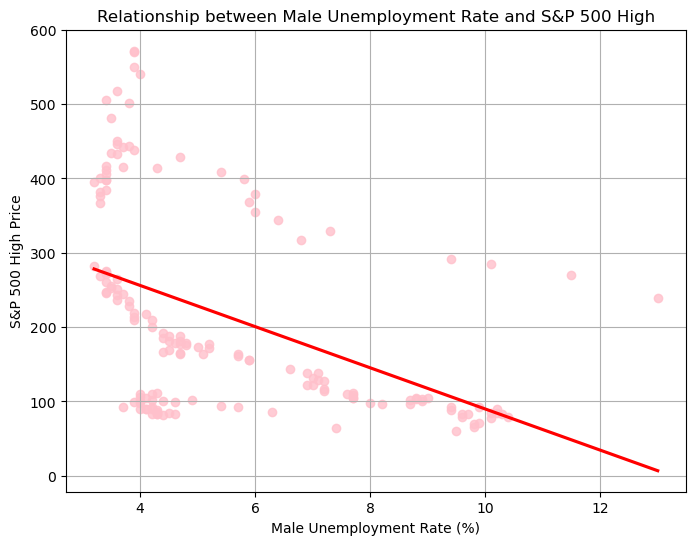

In [40]:
# First Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x=merged_df["Male Rate"], y=merged_df["High"], ci=None, scatter_kws={"color": "pink"}, line_kws={"color": "red"})
plt.title("Relationship between Male Unemployment Rate and S&P 500 High")
plt.xlabel("Male Unemployment Rate (%)")
plt.ylabel("S&P 500 High Price")
plt.grid(True)
plt.show()


In [41]:
# Hypothesis test for unemployment in women
from scipy.stats import pearsonr

# Female unemployment rate vs SP500 High
corr_coeff, p_value = pearsonr(merged_df["Female Rate"], merged_df["High"])

print(f"Correlation Coefficient: {corr_coeff:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Significant correlation exists.")
else:
    print("Fail to reject H0: No significant correlation.")


Correlation Coefficient: -0.4088
P-Value: 0.0000
Reject H0: Significant correlation exists.


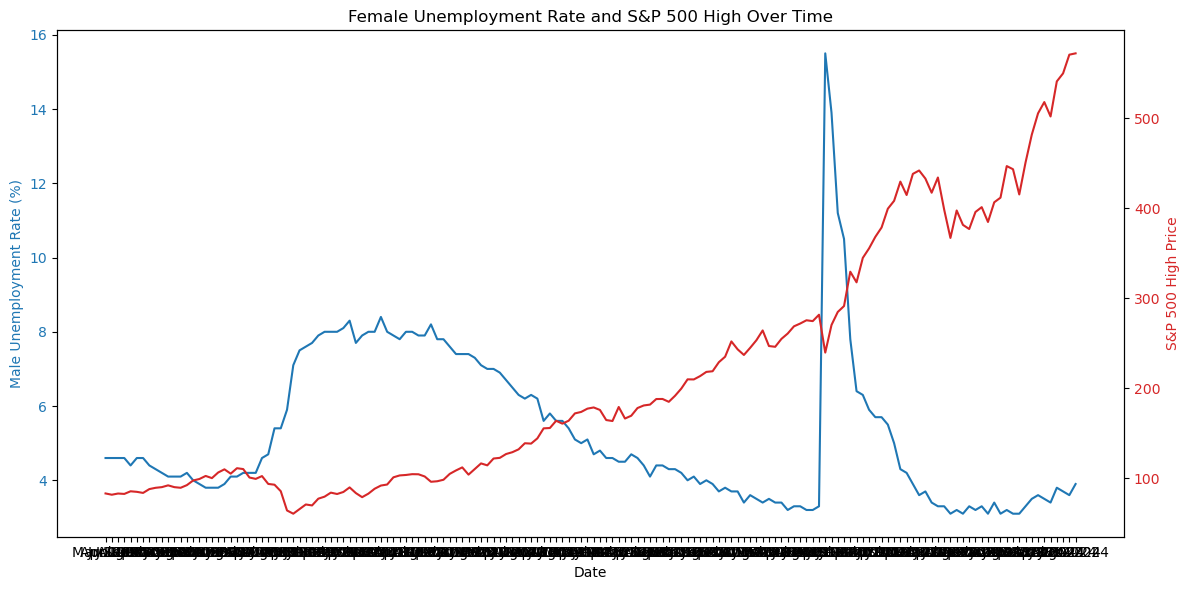

In [43]:
# Second visualization

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Unemployment (Female Rate)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Male Unemployment Rate (%)', color=color)
ax1.plot(merged_df["Date"], merged_df["Female Rate"], color=color, label="Female Unemployment Rate")
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for SP500
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('S&P 500 High Price', color=color)
ax2.plot(merged_df["Date"], merged_df["High"], color=color, label="S&P 500 High")
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Female Unemployment Rate and S&P 500 High Over Time')
fig.tight_layout()
plt.show()


In [44]:
# Create the binary target: 1 if S&P 500 Close increased, 0 if decreased
merged_df["SP500_Up"] = (merged_df["Close Change"] > 0).astype(int)


In [45]:
import statsmodels.api as sm

# Defining features and target
features = merged_df[["Male Rate", "Female Rate", "Teen Rate", "White Rate", "Black Rate", "Asian Rate", "Hispanic Rate"]]
target = merged_df["SP500_Up"]


features = sm.add_constant(features)

# Fitting logistic regression
logit_model = sm.Logit(target, features)
result = logit_model.fit()

# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.619609
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               SP500_Up   No. Observations:                  156
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 Apr 2025   Pseudo R-squ.:                 0.02656
Time:                        20:55:48   Log-Likelihood:                -96.659
converged:                       True   LL-Null:                       -99.296
Covariance Type:            nonrobust   LLR p-value:                    0.6265
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2789      0.745      0.374      0.708      -1.182       1.740
Male Rate         1.

# Interpreting the Results:
Univariate Statistics: From the output, you will see the distribution of unemployment rates across each demographic group and the S&P 500 closing prices. This will give you a sense of central tendency, variability, and overall trends.

Correlation Analysis: The correlation values will show how strongly the unemployment rate for each demographic group is related to the S&P 500’s performance. A strong positive or negative correlation will indicate a meaningful relationship, while a weak correlation will suggest no significant linear relationship.

Regression Analysis: The regression results will show you:
- The coefficient of each demographic group’s unemployment rate (indicating its effect on the S&P 500).

- The p-value (indicating whether the relationship is statistically significant).

- The R-squared value (indicating how well the demographic’s unemployment rate explains the variance in the S&P 500).

# Conclusion from Analysis:
By combining the univariate and bivariate analyses, you can:
- Determine which demographic group’s unemployment rate is most strongly correlated with S&P 500 performance.

- Identify whether any demographic group’s unemployment rate has a statistically significant impact on the S&P 500 index.

- Understand the overall relationship (positive or negative) between unemployment rates and S&P 500 performance.